### Hotel booking prediction

In this project we are going to analyze which hotels have the most guest,which are most expensive,in what period of the year each hotel has the most guests. After analyzing we are going to see what features are most correlated with our target variable and based on that we are going to use only those features which are the most significant. After doing some feature engineering and preprocessing we are going to make a model that will predict will guest cancel hotel booking or not. We are going to use several machine learning like RandomForrest,LogisticRegression,KNN etc.

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.api.types import CategoricalDtype
from sklearn.feature_selection import mutual_info_classif

In [182]:
pd.set_option("display.max.columns", None)

In [183]:
df=pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


Data information:

- hotelHotel (H1 = Resort Hotel or H2 = City Hotel)
- is_canceled=Value indicating if the booking was canceled (1) or not (0)
- lead_time= Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year =Year of arrival date
- arrival_date_month =Month of arrival date
- arrival_date_week_number Week number of year for arrival date
- arrival_date_day_of_month=Day of arrival date
- stays_in_weekend_nights=Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_week_nights=Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults=Number of adults
- children=Number of children
- babies=Number of babies

- meal=Type of meal booked. Categories are presented in standard hospitality meal packages: 
Undefined/SC  no meal package; BB  Bed & Breakfast; HB  Half board (breakfast and one other meal  usually dinner); FB  Full board (breakfast, lunch and dinner)

- country=Country of origin. Categories are represented in the ISO 31553:2013 format
- market_segment=Market segment designation. In categories, the term TA means Travel Agents and TO means Tour Operators
- distribution_channel=Booking distribution channel. The term TA means Travel Agents and TO means Tour Operators
- is_repeated_guest=Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations=Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled=Number of previous bookings not cancelled by the customer prior to the current booking
- reserved_room_type=Code of room type reserved. Code is presented instead of designation for anonymity reasons.

- assigned_room_type - Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.

- booking_changes=Number of changes/amendments made to the booking from the moment the booking was entered 
on the PMS until the moment of check-in or cancellation

- deposit_type=Indication on if the customer made a deposit to guarantee the booking.  This variable can assume three categories: No Deposit  no deposit was made; Non Refund  a deposit was made in the value of the total stay cost; Refundable  a deposit was made with a value
  under the total cost of stay.
  
- agent=ID of the travel agency that made the booking
- company=ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- days_in_waiting_list=Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type - Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group  when the booking is associated to a group; Transient  when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party  when the booking is transient, but is associated to at least other transient booking
- adr=Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces=Number of car parking spaces required by the customer
- total_of_special_requests=Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status=Reservation last status, assuming one of three categories: Canceled  booking was canceled by the customer; Check-Out  customer has checked in but already departed; No-Show  customer did not check-in and did inform the hotel of the reason why
- reservation_status_date=Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel

In [184]:
df.shape

(119390, 32)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Handle missing values

In [186]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

We can see that "company" column has the most null values so we are going to drop that column. We will replace null values from  "country" with "UNKNOWN" value and "children","agent" with 0. 

In [187]:
df["children"]=df["children"].fillna(0)

In [188]:
df["country"]=df["country"].fillna("UNKNOWN")

In [189]:
df["agent"]=df["agent"].fillna(0)

In [190]:
df=df.drop("company",axis=1)

In [191]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [192]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


We can see we have 0 adults,so we will filter out values in which adults are equal to 0 and children and babies are also 0 because  it's not possible that children and babies can book without thier parents.

In [193]:
columns=["adults","children","babies"]
out=(df["adults"]==0) & (df["children"]==0) & (df["babies"]==0)
df[out]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0.0,0,Transient-Party,0.00,0,0,Check-Out,10/6/2015
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0.0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0.0,0,Transient,0.00,0,0,Check-Out,10/12/2015
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0.0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38.0,0,Transient-Party,0.00,0,0,Check-Out,11/23/2015
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,1/4/2016
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308.0,122,Transient-Party,0.00,0,0,Check-Out,1/5/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0.0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7.0,0,Transient,100.80,0,0,Check-Out,6/30/2017
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0.0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0.0,0,Transient,0.00,1,1,Check-Out,7/1/2017
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0.0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425.0,0,Transient,73.80,0,0,Check-Out,7/17/2017
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0.0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient-Party,22.86,0,1,Check-Out,7/22/2017


In [194]:
df2=df[~out]
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [195]:
df2.shape

(119210, 31)

## Where do guests come from?

In [196]:
country_not_canceled=df2[df2["is_canceled"]==0]["country"].value_counts().reset_index()
country_not_canceled.columns=["country","number_of_guest"]
country_not_canceled

,country,number_of_guest
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,MAC,1
162,BHR,1
163,ZMB,1
164,ATF,1


In [197]:
import folium
from folium.plugins import HeatMap

In [198]:
map=folium.Map()

In [199]:
import plotly.express as px

In [200]:
map_guest=px.choropleth(country_not_canceled,
             locations=country_not_canceled["country"],
             color=country_not_canceled["number_of_guest"],
             hover_name=country_not_canceled["country"],
             title="Home country of guests")
map_guest.show()

From the guest map above we can see that in Portugal we have the most guests around 21 000.

## How much do guest pay for a night?

In [201]:
country_2=df2[df2["is_canceled"]==0]
country_2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

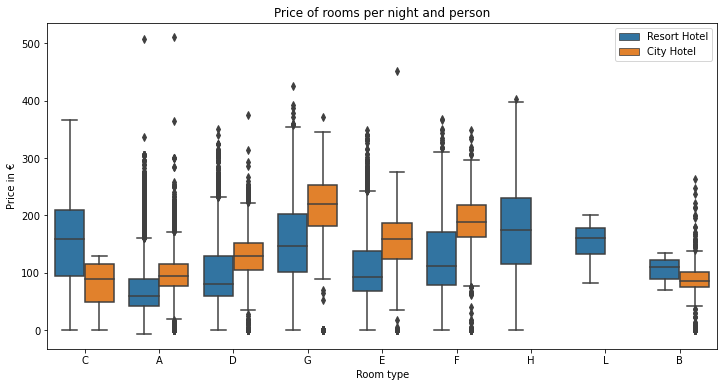

In [202]:
plt.figure(figsize=(12,6))
sns.boxplot(x="reserved_room_type",y="adr",hue="hotel",data=country_2)
plt.title("Price of rooms per night and person")
plt.xlabel("Room type")
plt.ylabel("Price in €")
plt.legend()
plt.show()

From above we don't see any significant correlation between room type and price. MOst expensive  room type in Resort hotel category is H and from City hotel category is G.

## How does the price per night vary over the months?

In [203]:
resort=df2[(df2["hotel"]=="Resort Hotel")& (df2["is_canceled"]==0)]
city=df2[(df2["hotel"]=="City Hotel")& (df2["is_canceled"]==0)]

In [204]:
resort.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [205]:
resort_price=resort.groupby("arrival_date_month")["adr"].mean().reset_index()
resort_price

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [206]:
city_price=city.groupby("arrival_date_month")["adr"].mean().reset_index()
city_price

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [207]:
final=resort_price.merge(city_price,on="arrival_date_month")
final.columns=["Month","Price_for_resort","Price_for_city"]
final

,Month,Price_for_resort,Price_for_city
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [208]:
import sort_dataframeby_monthorweek as sd

In [209]:
def sort_data(df,colname):
    return sd.Sort_Dataframeby_Month(df,colname)

In [210]:
final=sort_data(final,"Month")
final

,Month,Price_for_resort,Price_for_city
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [211]:
px.line(final,x="Month",y=["Price_for_resort","Price_for_city"],title="Romm price per night over the months")

From line graph above we can clearly see that between June and August in resort hotels are most expensive,while in city hotels doesnt't change too much.

### How long do people stay at the hotels?

In [212]:
filter=df2['is_canceled']==0
clean_data=df2[filter]

In [213]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [214]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]

In [215]:
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [216]:
stay=clean_data.groupby(['total_nights','hotel']).agg('count').reset_index()
stay=stay.iloc[:,0:3]
stay.head()

,total_nights,hotel,is_canceled
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


In [217]:
stay=stay.rename(columns={'is_canceled':'Number of stays'})
stay.head()

,total_nights,hotel,Number of stays
0,0,City Hotel,251
1,0,Resort Hotel,371
2,1,City Hotel,9155
3,1,Resort Hotel,6579
4,2,City Hotel,10983


<AxesSubplot:xlabel='total_nights', ylabel='Number of stays'>

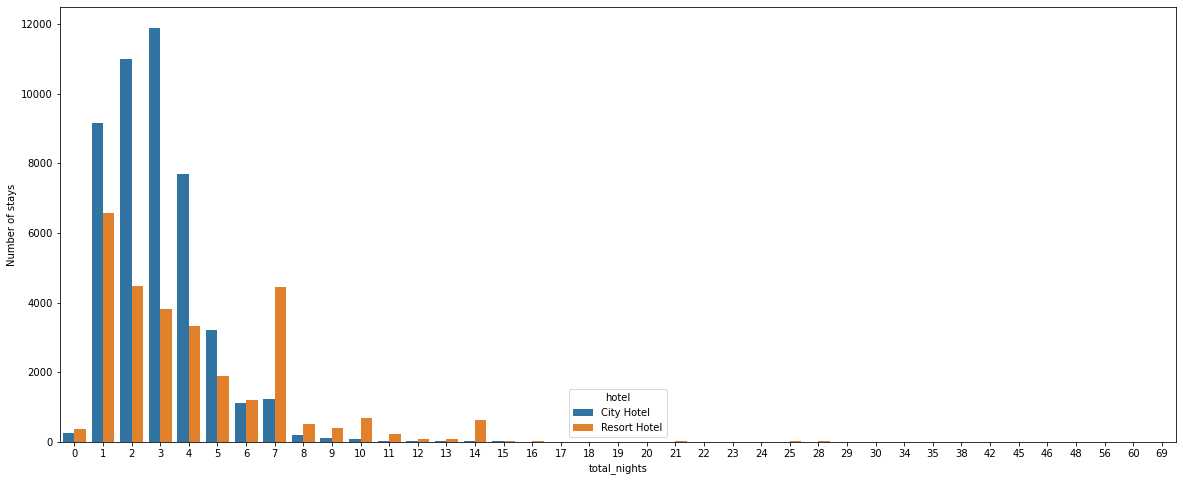

In [218]:
plt.figure(figsize=(20, 8))
sns.barplot(x = "total_nights", y = "Number of stays" , hue="hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=stay)

### In which months guests are high? 

In [219]:
rush_resort=resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns=["Month","Number_of_guest"]
rush_resort

,Month,Number_of_guest
0,August,3257
1,July,3137
2,October,2575
3,March,2571
4,April,2550
5,May,2535
6,February,2308
7,September,2102
8,June,2037
9,December,2014


In [220]:
rush_city=city["arrival_date_month"].value_counts().reset_index()
rush_city.columns=["Month","Number_of_guest"]
rush_city

,Month,Number_of_guest
0,August,5367
1,July,4770
2,May,4568
3,June,4358
4,October,4326
5,September,4283
6,March,4049
7,April,4010
8,February,3051
9,November,2676


In [221]:
rush_final=rush_resort.merge(rush_city,on="Month")
rush_final.columns=["Month","Number_of_guest_resort","Number_of_guest_city"]
rush_final

,Month,Number_of_guest_resort,Number_of_guest_city
0,August,3257,5367
1,July,3137,4770
2,October,2575,4326
3,March,2571,4049
4,April,2550,4010
5,May,2535,4568
6,February,2308,3051
7,September,2102,4283
8,June,2037,4358
9,December,2014,2377


In [222]:
rush_final=sort_data(rush_final,"Month")
rush_final

,Month,Number_of_guest_resort,Number_of_guest_city
0,January,1866,2249
1,February,2308,3051
2,March,2571,4049
3,April,2550,4010
4,May,2535,4568
5,June,2037,4358
6,July,3137,4770
7,August,3257,5367
8,September,2102,4283
9,October,2575,4326


In [223]:
px.line(rush_final,x="Month",y=["Number_of_guest_resort","Number_of_guest_city"],title="Number of guest per months")

From line graph above we can see that number of guest are highest between June amd August in resort and city hotels. Also, city hotels have more guests then resort hotels.

## Feature selection

In [224]:
df2.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


### Pearson and Spearman correlation

The size of a correlation coefficient suggests correlation between independent and dependent variable. p-value indicates significance of correlation coefficient (p-value <= 0.05). We will use the following methods to calculate the correlation coefficients:

- Pearson correlation coefficient - strength and direction of the linear relationship between two variables
- Spearman correlation coefficient - Spearman's correlation determines the strength and direction of the monotonic relationship between two variables rather than the strength and direction of the linear relationship between two variables

In [225]:
import scipy as sc

stats_pe_spe = {"corr": [], "p-value": []}

pearson_price_points = sc.stats.pearsonr(df2.adr, df2.is_canceled)
spearman_price_points = sc.stats.spearmanr(df2.adr, df2.is_canceled)

for i in range(len(list(stats_pe_spe.keys()))):
    stats_pe_spe[list(stats_pe_spe.keys())[i]].append(pearson_price_points[i])
    stats_pe_spe[list(stats_pe_spe.keys())[i]].append(spearman_price_points[i])

pd.DataFrame(stats_pe_spe, columns=['corr', 'p-value'], index=['pearson', 'spearman'])

,corr,p-value
pearson,0.046492,4.809995e-58
spearman,0.049927,1.144407e-66


P-value near zero indicates significance of correlation coefficient but correlation coefficient need to be abs(corr) >= 0.5. More siginificat relationship is between 0.7-1.
Adr feature can be included in input dataset but it will not siginifantly influence on ML model accuracy in positive manner.

#### Calculate Spearman correlation coefficient
Spearman's correlation determines the strength and direction of the monotonic relationship between two variables rather than the strength and direction of the linear relationship between two variables.

To be able to calculate spearman coefficient firstly we need to encode nominal variables to numerical ones with further encoders:

The CountFrequencyEncoder() replaces categories by either the count or the percentage of observations per category.For example in the variable colour, if 10 observations are blue, blue will be replaced by 10. Alternatively, if 10% of the observations are blue, blue will be replaced by 0.1.
The DecisionTreeEncoder() encodes categorical variables with predictions of a decision tree model. Each categorical feature is recoded by training a decision tree, typically of limited depth (2, 3 or 4) using that feature alone, and let the tree directly predict the target. The probabilistic predictions of this decision tree are used as the new values of the original categorical feature, that now is linearly (or at least monotonically) correlated with the target.

In [226]:
categorical_features=[col for col in df2.columns if df2[col].dtype=="O"]
categorical_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

In [227]:
from feature_engine.encoding import CountFrequencyEncoder, DecisionTreeEncoder
from feature_engine import transformation as vt
import scipy.stats

encoders = [
            'CountFrequencyEncoder',
            'DecisionTreeEncoder'
            ]

feature_cols = ['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status',
 'reservation_status_date']

def calculate_statistics(df):
    """
    Calculate spearman's coefficient for different types of encoders.
    param df: pandas dataframe with filled missing values
    return: stats dict
    """
    features = df2.loc[:, feature_cols]
    target = df2["is_canceled"]
    
    encoder_dict = {}
    
    for en in encoders:
        if en == 'CountFrequencyEncoder':
            encoder = CountFrequencyEncoder(encoding_method='frequency', variables=feature_cols)
        
        elif en == 'DecisionTreeEncoder':
            encoder = DecisionTreeEncoder(variables=feature_cols, random_state=0)
        
        else:
            raise ValueError("{} encoder not recognised.".format(en))
        
        # fit the encoder
        encoder.fit(features, target)

        # transform the data
        features_not_null_encoded = encoder.transform(features).reset_index()
        target = target.reset_index().drop('index', axis=1)
        features_not_null_encoded = features_not_null_encoded.drop('index', axis=1)
        
        # calculate statistics
        stats_list = {key:[] for key in feature_cols}
        
        for col in feature_cols:
            # spearman's coefficient
            stats_list[col].append(scipy.stats.spearmanr(features_not_null_encoded[col], target)[0])
            # p-value
            stats_list[col].append(scipy.stats.spearmanr(features_not_null_encoded[col], target)[1])
        
        encoder_dict[en] = stats_list
        
    return encoder_dict

In [228]:
stats = calculate_statistics(categorical_features)
stats

{'CountFrequencyEncoder': {'hotel': [0.1370821425318648, 0.0],
  'arrival_date_month': [0.04143922247894488, 1.7985869323351315e-46],
  'meal': [0.010481468401298173, 0.00029576968303952954],
  'country': [0.27361933311038544, 0.0],
  'market_segment': [0.026259038567700493, 1.2136129355870296e-19],
  'distribution_channel': [0.17354591478605455, 0.0],
  'reserved_room_type': [0.06741422779863337, 4.207112116688955e-120],
  'assigned_room_type': [0.19234492063906042, 0.0],
  'deposit_type': [-0.47710565133195243, 0.0],
  'customer_type': [0.13151810317888996, 0.0],
  'reservation_status': [-0.9971133524319622, 0.0],
  'reservation_status_date': [0.17683147524846066, 0.0]},
 'DecisionTreeEncoder': {'hotel': [0.1370821425318648, 0.0],
  'arrival_date_month': [0.04631931794202446, 1.2574120035662665e-57],
  'meal': [0.02598318213246654, 2.896428185557696e-19],
  'country': [0.33694322732296966, 0.0],
  'market_segment': [0.2618823514163422, 0.0],
  'distribution_channel': [0.1751737983445

Results shows high correlation between reservation_status and  target variable.We will investigate this and decide what we will do.Also deposit_type have good correlation around -0.5. Accepted results will have spearman coefficient higher than abs(s_coeff_var_n) >= 0.5. 

In [229]:
df2.groupby("is_canceled")["reservation_status"].value_counts()

is_canceled  reservation_status
0            Check-Out             75011
1            Canceled              42993
             No-Show                1206
Name: reservation_status, dtype: int64

From results above we can desice to drop reservation_status column because they are same.

In [230]:
df2=df2.drop("reservation_status",axis=1)

### Pearson coefficient

In [231]:
correletion=df2.corr()["is_canceled"]
correletion.abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.292876
total_of_special_requests         0.234877
required_car_parking_spaces       0.195701
booking_changes                   0.144832
previous_cancellations            0.110139
is_repeated_guest                 0.083745
adults                            0.058182
previous_bookings_not_canceled    0.057365
days_in_waiting_list              0.054301
agent                             0.046770
adr                               0.046492
babies                            0.032569
stays_in_week_nights              0.025542
arrival_date_year                 0.016622
arrival_date_week_number          0.008315
arrival_date_day_of_month         0.005948
children                          0.004851
stays_in_weekend_nights           0.001323
Name: is_canceled, dtype: float64

In [232]:
numerical_features=[col for col in df2.columns if df2[col].dtype!="O"]
numerical_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [233]:
df2.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status_date'],
      dtype='object')

In [234]:
def make_mi_scores(X, y):
    """
    Calculate mutual information scores for all categorical variables in relation to  target variable.
    param x:           input pandas dataframe with excluded target variable
    param y:           input pandas series of target variable
    return mi_scores:  pandas series, mutual info scores
    """
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    plt.figure(figsize=(12,6))
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [235]:
df_mut_info = df2
x = df_mut_info.drop(["is_canceled"],axis=1)
y = df2['is_canceled']
mi_scores = make_mi_scores(x, y)
mi_scores

reservation_status_date           0.132355
deposit_type                      0.131037
lead_time                         0.083703
adr                               0.080908
agent                             0.080567
country                           0.067490
previous_cancellations            0.041211
market_segment                    0.036761
total_of_special_requests         0.036664
required_car_parking_spaces       0.029995
assigned_room_type                0.021399
booking_changes                   0.019738
distribution_channel              0.017111
days_in_waiting_list              0.015234
customer_type                     0.009824
hotel                             0.009618
previous_bookings_not_canceled    0.008938
stays_in_week_nights              0.007193
arrival_date_week_number          0.004823
is_repeated_guest                 0.004022
adults                            0.003825
reserved_room_type                0.002697
arrival_date_month                0.002466
arrival_dat

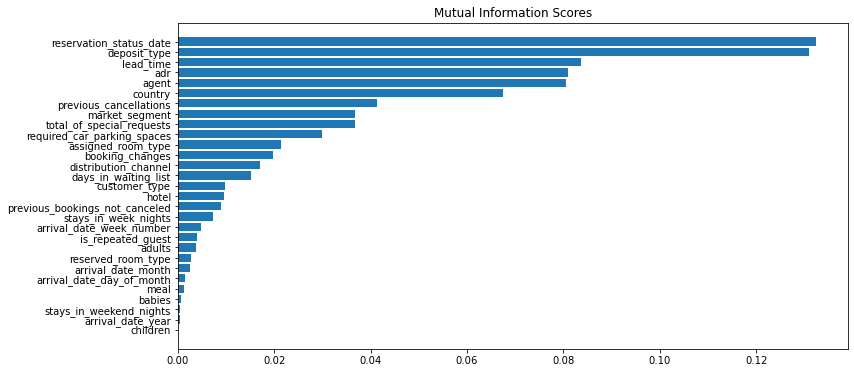

In [236]:
plot_mi_scores(mi_scores)

As we can see reservation_status_date is the most relevant variable.

In [237]:
top10=mi_scores[:10].reset_index()
top10.columns=["feature","score"]
top10

,feature,score
0,reservation_status_date,0.132355
1,deposit_type,0.131037
2,lead_time,0.083703
3,adr,0.080908
4,agent,0.080567
5,country,0.067490
6,previous_cancellations,0.041211
7,market_segment,0.036761
8,total_of_special_requests,0.036664
9,required_car_parking_spaces,0.029995


### Conclusion
As we can see we dont't have significant correlation between features and target variable. Because of that we will drop features that we believe are not important and will not improve our model accuracy. 

In [238]:
list_not=['days_in_waiting_list','arrival_date_year']

In [239]:
num_features=[col for col in df2.columns if df2[col].dtype!='O' and col not in list_not]
num_features

['is_canceled',
 'lead_time',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [240]:
cat_not=['arrival_date_year', 'assigned_room_type', 'booking_changes', 'reservation_status', 'country','days_in_waiting_list']

In [241]:
cat_features=[col for col in df2.columns if df2[col].dtype=='O' and col not in cat_not]
cat_features

['hotel',
 'arrival_date_month',
 'meal',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status_date']

### Extract data from features

In [242]:
import warnings
warnings.filterwarnings('ignore')

In [243]:
data_cat=df2[cat_features]
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,7/1/2015
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,7/2/2015
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,7/2/2015
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,7/3/2015


In [244]:
data_cat["reservation_status_date"]=pd.to_datetime(data_cat["reservation_status_date"])
data_cat["year_reservation"]=data_cat["reservation_status_date"].dt.year
data_cat["month_reservation"]=data_cat["reservation_status_date"].dt.month
data_cat["day_reservation"]=data_cat["reservation_status_date"].dt.day

In [245]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year_reservation,month_reservation,day_reservation
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [246]:
data_cat=data_cat.drop("reservation_status_date",axis=1)

In [247]:
data_cat["cancel"]=df2["is_canceled"]

In [248]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year_reservation,month_reservation,day_reservation,cancel
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1,0
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2,0
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2,0
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3,0


## Feature Encoding

### Mean  Encoding

The MeanEncoder() replaces categories by the mean value of the target for each category.

For example in the variable colour, if the mean of the target for blue, red and grey is 0.5, 0.8 and 0.1 respectively, blue is replaced by 0.5, red by 0.8 and grey by 0.1.

In [249]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year_reservation', 'month_reservation',
       'day_reservation', 'cancel'],
      dtype='object')

In [250]:
cols=data_cat.columns[0:8]
cols

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type'],
      dtype='object')

In [251]:
#making mean encoding
for col in cols:
    dict=data_cat.groupby([col])['cancel'].mean().to_dict()
    data_cat[col]=data_cat[col].map(dict)

In [252]:
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year_reservation,month_reservation,day_reservation,cancel
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0


In [253]:
data=pd.concat([data_cat,df2[num_features]],axis=1)
data.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year_reservation,month_reservation,day_reservation,cancel,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
0,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,342,27,1,0,0,2,0.0,0,0,0,0,3,0.0,0.0,0,0
1,0.277674,0.374644,0.374106,0.153712,0.174868,0.330827,0.28402,0.407864,2015,7,1,0,0,737,27,1,0,0,2,0.0,0,0,0,0,4,0.0,0.0,0,0
2,0.277674,0.374644,0.374106,0.153712,0.174868,0.391567,0.28402,0.407864,2015,7,2,0,0,7,27,1,0,1,1,0.0,0,0,0,0,0,0.0,75.0,0,0
3,0.277674,0.374644,0.374106,0.187618,0.220568,0.391567,0.28402,0.407864,2015,7,2,0,0,13,27,1,0,1,1,0.0,0,0,0,0,0,304.0,75.0,0,0
4,0.277674,0.374644,0.374106,0.367590,0.410598,0.391567,0.28402,0.407864,2015,7,3,0,0,14,27,1,0,2,2,0.0,0,0,0,0,0,240.0,98.0,0,1


In [254]:
data=data.drop(["is_canceled"],axis=1)
data.shape

(119210, 28)

### Handle Outliers

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

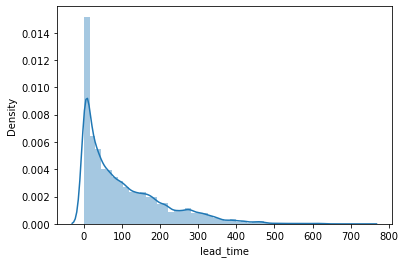

In [255]:
sns.distplot(data["lead_time"])

In [256]:
def transform_outlier(col):
    data[col]=np.log1p(data[col])

In [257]:
transform_outlier("lead_time")

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

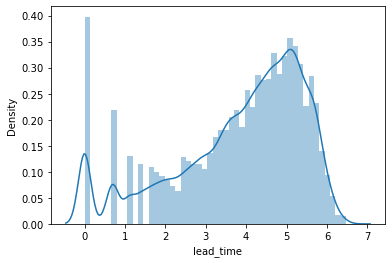

In [258]:
sns.distplot(data["lead_time"])

<AxesSubplot:xlabel='adr', ylabel='Density'>

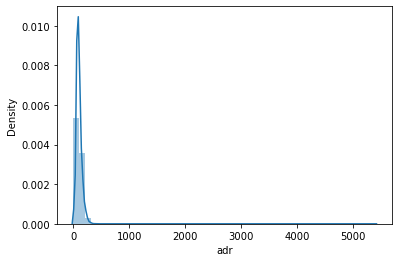

In [259]:
sns.distplot(data["adr"])

In [260]:
transform_outlier("adr")

<AxesSubplot:xlabel='adr', ylabel='Density'>

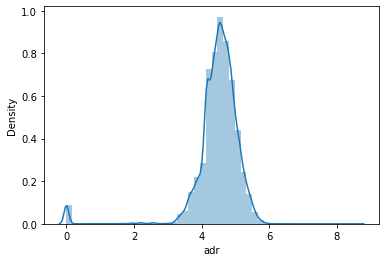

In [261]:
sns.distplot(data["adr"].dropna())

### Feature importance

In [262]:
data.isnull().sum()

hotel                             0
arrival_date_month                0
meal                              0
market_segment                    0
distribution_channel              0
reserved_room_type                0
deposit_type                      0
customer_type                     0
year_reservation                  0
month_reservation                 0
day_reservation                   0
cancel                            0
lead_time                         0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
agent                             0
adr                               1
required_car_parking_spaces       0
total_of_special_requests   

In [263]:
data=data.dropna()

In [264]:
y=data["cancel"]
X=data.drop("cancel",axis=1)

In [265]:
X.shape

(119209, 27)

In [266]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [267]:
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.
feature_selection=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [268]:
feature_selection.fit(X,y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [269]:
feature_selection.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True])

In [270]:
cols=X.columns

In [271]:
selected_features=cols[feature_selection.get_support()]
selected_features

Index(['deposit_type', 'year_reservation', 'month_reservation',
       'day_reservation', 'lead_time', 'arrival_date_week_number', 'adults',
       'children', 'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'agent', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')

In [272]:
selected_features.shape

(15,)

In [273]:
X=X[selected_features]
X.head()

,deposit_type,year_reservation,month_reservation,day_reservation,lead_time,arrival_date_week_number,adults,children,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
0,0.28402,2015,7,1,5.837730,27,2,0.0,0,0,3,0.0,0.000000,0,0
1,0.28402,2015,7,1,6.603944,27,2,0.0,0,0,4,0.0,0.000000,0,0
2,0.28402,2015,7,2,2.079442,27,1,0.0,0,0,0,0.0,4.330733,0,0
3,0.28402,2015,7,2,2.639057,27,1,0.0,0,0,0,304.0,4.330733,0,0
4,0.28402,2015,7,3,2.708050,27,2,0.0,0,0,0,240.0,4.595120,0,1


### Applying machine learning algorithm

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.25,random_state=0)

In [287]:
train_y.value_counts()

0    56371
1    33035
Name: cancel, dtype: int64

## SMOTE for balancing data
As we can see we have a lot more customers that are staying then that are leaving. Because of this we need to equalize those parameters to get better result. We will use SMOTE technique. SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [289]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')      
X_s, y_s = smote.fit_resample(X, y)

In [290]:
y_s.value_counts()

1    75010
0    75010
Name: cancel, dtype: int64

In [291]:
#Splitting our data on train and test
train_X, test_X, train_y,test_y = train_test_split(X_s, y_s, test_size=0.25, random_state=0, stratify=y_s)

In [292]:
from sklearn.linear_model import LogisticRegression

In [293]:
lr=LogisticRegression()

In [294]:
lr.fit(train_X,train_y)

LogisticRegression()

In [295]:
predict=lr.predict(test_X)
predict

array([1, 1, 1, ..., 0, 1, 0])

In [296]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [297]:
confusion_matrix(test_y,predict)

array([[12968,  5785],
       [ 4497, 14255]])

In [298]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           0       0.74      0.69      0.72     18753
           1       0.71      0.76      0.73     18752

    accuracy                           0.73     37505
   macro avg       0.73      0.73      0.73     37505
weighted avg       0.73      0.73      0.73     37505



In [299]:
from sklearn.metrics import accuracy_score

In [300]:
acc=accuracy_score(test_y,predict)
acc

0.7258498866817757

In [301]:
from sklearn.model_selection import cross_val_score

In [302]:
score=cross_val_score(lr,X,y,cv=10)

In [303]:
score.mean()

0.7089904095980868

### Applying multiple algorithms

In [304]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [305]:
# classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [306]:
for name, model in models:
    print(name)
    model.fit(train_X, train_y)
    
    # Make predictions.
    predictions = model.predict(test_X)

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,test_y))
    print('\n')

LogisticRegression
0.7258498866817757


Naive Bayes
0.6748966804426076


RandomForest
0.9585655245967204


Decision Tree
0.9383015597920278


KNN
0.9417144380749234




As we can see RandomForest classifier have the best accuracy 95.8%